# 导入依赖库

In [2]:
import struct 
import numpy as np
from matplotlib import pyplot as plt 

# 通过struct.unpack 解码

In [ ]:
def load_temper():
    import read_exif
    temper = read_exif.parse("data/face1.jpg").temper_face
    w,h,c = struct.unpack('iii', temper[:12])
    data = struct.unpack(f"{w*h}f", temper[12:])
    mat = np.array(data)
    mat.shape = (h, w)
    return mat

temper = load_temper()
print(temper)

# 通过 np.frombuffer 解码

def load_temper2():
    import read_exif
    temper = read_exif.parse("data/face1.jpg").temper_face
    size = np.frombuffer(temper[:12], dtype=np.int32)
    mat = np.frombuffer(temper[12:], dtype=np.float32)
    mat.shape = (size[1], size[0])
    return mat

temper2 = load_temper2()
print(temper2)

temper = temper2

In [3]:
def load_temper3():
    temper = np.load("/home/temper.bin")
    num = np.frombuffer(temper[:4], dtype=np.int32)
    time = np.frombuffer(temper[4:12], dtype=np.int64)
    size = np.frombuffer(temper[12:20], dtype=np.float32)
    mat.shape = (size[1], size[0])
    return mat

temper3 = load_temper3()
print(temper3)

temper = temper3

FileNotFoundError: [Errno 2] No such file or directory: '/home/temper.bin'

# 显示二维图

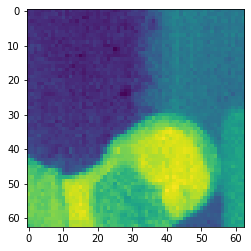

In [31]:
plt.imshow(temper)
plt.show()

# 显示灰度图

[[ 31  38  31 ... 102  98 102]
 [ 27  36  29 ... 110 100 106]
 [ 38  36  34 ... 100 100 116]
 ...
 [190 193 190 ... 149 162 149]
 [184 188 193 ... 141 143 143]
 [166 182 191 ... 145 153 151]]


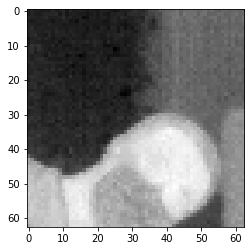

In [32]:
scale = 255 / (temper.max() - temper.min()+1)
temper = (temper - temper.min()) * scale
temper = temper.astype(np.uint8)
print(temper)
plt.imshow(temper, cmap='gray')

#plt.imshow(temper, cmap='gray', vmin=temper.min(), vmax=temper.max())
#plt.imshow(temper, cmap='gray')
plt.show()

# 三维显示

(255, 233)


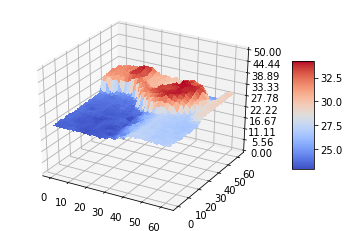

In [45]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter

temper = load_temper2()

fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(0, temper.shape[1])
Y = np.arange(0, temper.shape[0])
X, Y = np.meshgrid(X, Y)
Z = temper

surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.coolwarm, linewidth=0, antialiased=False)

ax.set_zlim(0, 50)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()
